In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

In [2]:
for column in ['gender', 'signup_method', 'language',
               'affiliate_channel', 'affiliate_provider',
               'first_affiliate_tracked', 'signup_app',
               'first_device_type', 'first_browser']:
    plt.figure(figsize=(16,9))
    sns.countplot(df[column], hue=df['country_destination'])
    plt.title(column)
    plt.xticks(rotation=90)
    plt.show()

NameError: name 'sns' is not defined

<Figure size 1152x648 with 0 Axes>

In [5]:
# import df:
df = pd.read_csv('./Datasets/cleaned_df.csv')
df.head()

,date,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
0,2013-01-01,California,Alameda,1,62,Moderate,PM2.5,06-001-0007,4
1,2013-01-02,California,Alameda,1,61,Moderate,PM2.5,06-001-0007,4
2,2013-01-03,California,Alameda,1,81,Moderate,PM2.5,06-001-0007,4
3,2013-01-04,California,Alameda,1,78,Moderate,PM2.5,06-001-0007,4
4,2013-01-05,California,Alameda,1,84,Moderate,PM2.5,06-001-0007,4


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df = df.set_index('date')

In [10]:
df.head()

,state_name,county_name,county_code,aqi,category,defining_parameter,defining_site,number_of_sites_reporting
date,,,,,,,,
2013-01-01,California,Alameda,1,62,Moderate,PM2.5,06-001-0007,4
2013-01-02,California,Alameda,1,61,Moderate,PM2.5,06-001-0007,4
2013-01-03,California,Alameda,1,81,Moderate,PM2.5,06-001-0007,4
2013-01-04,California,Alameda,1,78,Moderate,PM2.5,06-001-0007,4
2013-01-05,California,Alameda,1,84,Moderate,PM2.5,06-001-0007,4


In [12]:
from statsmodels.tsa.stattools import adfuller

# adfuller(df['aqi'])[0:2]

In [16]:
for i in df.county_name.unique().tolist():
    mask = df[df['county_name'] == i]
    print(f" ADFuller scores for {i} is {adfuller(mask['aqi'])[0:2]}")

 ADFuller scores for Alameda is (-19.998393488258447, 0.0)
 ADFuller scores for Alpine is (-3.2326206351998152, 0.01817243143473612)
 ADFuller scores for Amador is (-4.374251810568105, 0.0003295751082804015)
 ADFuller scores for Butte is (-8.763214252713718, 2.6396965832190476e-14)
 ADFuller scores for Calaveras is (-5.673928907257773, 8.792945631045284e-07)
 ADFuller scores for Colusa is (-8.647658598002913, 5.2176015402288046e-14)
 ADFuller scores for Contra Costa is (-17.311319639786785, 5.552131411197455e-30)
 ADFuller scores for Del Norte is (-5.601897477567881, 1.2592555307787583e-06)
 ADFuller scores for El Dorado is (-4.5020173487931165, 0.00019499601616468942)
 ADFuller scores for Fresno is (-8.052208336816744, 1.7299163802619825e-12)
 ADFuller scores for Glenn is (-9.937582285881366, 2.7177429017752166e-17)
 ADFuller scores for Humboldt is (-6.711603959539166, 3.6687304350627987e-09)
 ADFuller scores for Imperial is (-6.991790149119383, 7.711303601909724e-10)
 ADFuller scores

In [24]:
la = la.sort_index()

In [37]:
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D wil

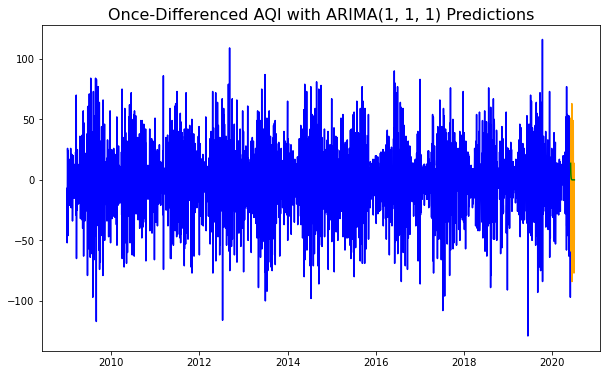

In [38]:
la = df[df['county_name'] == 'Los Angeles'].sort_index()

# split data:
y_train, y_test = train_test_split(la['aqi'], test_size=1/132, shuffle=False)

# instatiate ARIMA
model = ARIMA(endog=y_train, order=(1,1,1)) 

# fit ARIMA model
arima = model.fit()

#generate predictions
preds = model.predict(params = arima.params, start=y_test.index[0], end=y_test.index[-1])

# Plot data.
plt.figure(figsize=(10,6))
# Plot training data.
plt.plot(y_train.index, pd.DataFrame(y_train).diff(), color = 'blue')
# Plot testing data.
plt.plot(y_test.index, pd.DataFrame(y_test).diff(), color = 'orange')
# Plot predicted test values.
plt.plot(y_test.index, preds, color = 'green')
plt.title(label = 'Once-Differenced AQI with ARIMA(1, 1, 1) Predictions', fontsize=16)
plt.show();